In [1]:
import numpy as np
import pandas as pd
import nilearn

In [21]:
import pydicom as dicom

image_path = 'RAW_PPMI/3102/ep2d_RESTING_STATE/2013-02-06_10_38_32.0/I378209/PPMI_3102_MR_ep2d_RESTING_STATE_br_raw_20130626124735840_52_S193424_I378209.dcm'
directory_series = 'RAW_PPMI/3102/ep2d_RESTING_STATE/2013-02-24_10_49_22.0/I378209/'
ds = dicom.dcmread(image_path)


In [52]:
# convert to nifti (3D/4D Niimg-like object)
import dicom2nifti
dicom2nifti.convert_directory(directory_series, 'nifti_series', compression=True, reorient=True)

/opt/anaconda3/envs/cns/lib/python3.11/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.04529808191288135852'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


In [129]:
# get path to files in 'nifti_series'
import os

path = 'nifti_series'
file = 'nifti_series/10_ep2d_resting_state.nii'

In [ ]:
# Size of image:
# example: 50, 59, 50
# our ppmi: 68, 66, 40

In [130]:
from nilearn import image
img  = nilearn.image.load_img(file)
print(img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (68, 66, 40, 210)
affine:
[[ -3.29411769   0.          -0.         107.27710724]
 [ -0.           3.29411769  -0.         -79.77320862]
 [  0.          -0.           3.29999995 -79.86807251]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  4  68  66  40 210   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         3.2941177  3.2941177  3.3        1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slic

In [2]:
nifti_path = '/Users/yanis/Documents/Stanford/RESEARCH_FALL/nifti_series/10_ep2d_resting_state.nii.gz'

In [3]:
nifti_path_dcm2niix = '/Users/yanis/Documents/Stanford/RESEARCH_FALL/RAW_PPMI/3102/ep2d_RESTING_STATE/2013-02-06_10_38_32.0/I378209/ep2d_RESTING_STATE_10.nii'

In [ ]:
# command for converting:
# dcm2niix -f %p_%s -g y /Users/yanis/Documents/Stanford/RESEARCH_FALL/RAW_PPMI/3102/ep2d_RESTING_STATE/2013-02-06_10_38_32.0/I378209

 which to parameter to use? e.g.: "cort-maxprob-thr25-2mm",“cort-maxprob-thr0-1mm”, etc...

In [20]:
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker

## CORTICAL ##
dataset = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm", symmetric_split=True)
atlas_filename = dataset.maps
labels = dataset.labels

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
    labels=labels,
    resampling_target="data",
)

time_series = masker.fit_transform(nifti_path_dcm2niix)
print(time_series.shape)

## SUBCORTICAL ##
dataset_sub = datasets.fetch_atlas_harvard_oxford("sub-maxprob-thr25-2mm", symmetric_split=False)
atlas_filename_sub = dataset_sub.maps
labels_sub = dataset_sub.labels

masker_sub = NiftiLabelsMasker(
    labels_img=atlas_filename_sub,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
    labels=labels_sub,
)

time_series_sub = masker_sub.fit_transform(nifti_path_dcm2niix)
print(time_series_sub.shape)

# Concatenate the two time series together
time_series_concat = np.concatenate((time_series, time_series_sub), axis=1)
print(time_series_concat.shape)

[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling labels
[Memory]0.1s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
(210, 94)
[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling labels


/opt/anaconda3/envs/cns/lib/python3.11/site-packages/nilearn/maskers/nifti_labels_masker.py:554: UserWarning: After resampling the label image to the data image, the following labels were removed: {96, 95}. Label image only contains 95 labels (including background).
  warnings.warn("After resampling the label image to the "


[Memory]0.1s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
(210, 21)
(210, 115)


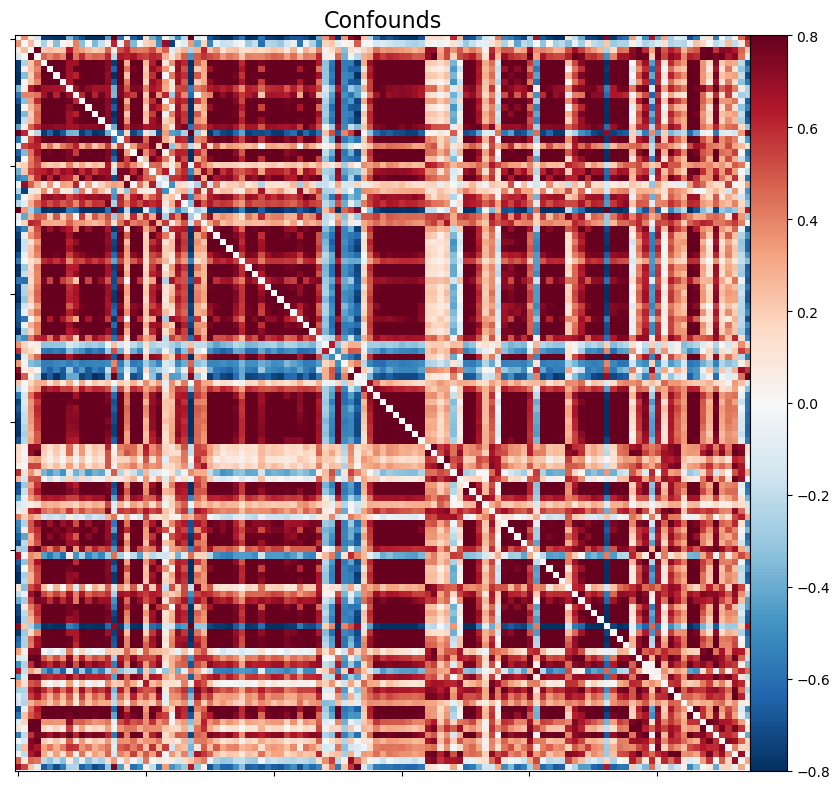

In [19]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([time_series_concat])[0]

# Plot the correlation matrix
import numpy as np

from nilearn import plotting

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(
    correlation_matrix,
    figure=(10, 8),
    vmax=0.8,
    vmin=-0.8,
    title="Confounds",
)

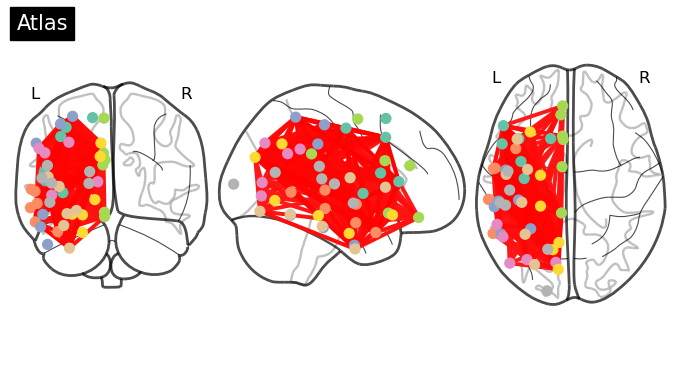

In [20]:
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_filename)
plotting.plot_connectome(
    correlation_matrix,
    coordinates,
    edge_threshold="80%",
    title="Atlas",
)